## Backtracking

1.   Permutation
2.   Combination
3.    All Paths





### Template

In [0]:
def backtrack():
  # initialization
  A #a working data structure, either a list of candidates or a graph or a matrix representing a board
  state_tracker = []*n
  assist_state_tracker
  # main backtracking
  def dfs(d, n):
    '''d: depth representing level in the tree'''
    if d == n:
      return
    candidates = generate_candidates(state_tracker, assist_state_tracker)
    for c in candidates: 
      set_state(state_tracker, assist_state_tracker, c)
      dfs(d+1, n)
      reset_state(state_tracler, assist_state_tracker, c)
      
  dfs(0, n)
      

### Permutations
How many ways to permutate an $n$-set? For example {1, 2, 3}: ???
* Enumerate by position This helps us to enumerate permuation with **backtracking**
```
{}
i=0: {1}, {2}, {3}
i=1: {1, 2}, {1, 3}, {2, 1}, {2, 3}, {3, 1}, {3,2}
i=2: {1, 2, 3}, {1, 3, 2}, {2, 1, 3}, {2, 3, 1}, {3, 1, 2}, {3, 2, 1}.
```
The recurrence relation is:
\begin{align}
d(i) = (n-i)*d(i-1)
\end{align}
Such that
```
d(0) = 3 * 1 = 3
d(1) = 2 * 3 = 6
d(2) = 1 * 6 = 6
```
*  Additionally, can enumerate by iterating elements, and then enumerate all possible positions that it can go.
```
: {}
1: {1}
2: {1, 2}, {2, 1} : can find i position to insert 2
3: {3, 1, 2}, {1, 3, 2}, {1, 2, 3}| {3, 2, 1}, {2, 3, 1}, {2, 1, 3}
```
\begin{align}
d(i) = i*d(i-1)
\end{align}
Such that:
```
d(0) = 1 * 1 = 1
d(1) = 2 * 1 = 2
d(2) = 3 * 2 = 6
```


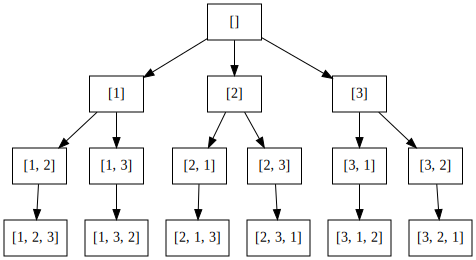

In [145]:
from graphviz import Digraph
dot = Digraph(comment='The Round Table', format='png')
dot.node_attr['shape']='box'
#print(get_methods(Digraph))
#print(Digraph.__dict__)
nodes = ['[]', '[1]', '[2]', '[3]', '[1, 2]', '[1, 3]', '[2, 1]', '[2, 3]', '[3, 1]', '[3, 2]', '[1, 2, 3]', '[1, 3, 2]', '[2, 1, 3]', '[2, 3, 1]', '[3, 1, 2]', '[3, 2, 1]']
for i, node in enumerate(nodes):
  dot.node(str(i), label=node)
edges = [('0', '1'), ('0', '2'), ('0', '3'), ('1', '4'), ('1', '5'), ('2', '6'), ('2', '7'), ('3', '8'), ('3', '9'), ('4', '10'), ('5', '11'), ('6', '12'), ('7', '13'), ('8', '14'), ('9', '15')]
for n1, n2 in edges:
  dot.edge(n1, n2)
# dot.edge('0', '1', _attributes={'label': '4'})
# dot.edge('S', 'B', _attributes={'label': '5'})
# dot.edge('A', 'G', _attributes={'label': '7'})
# dot.edge('B', 'G', _attributes={'label': '3'})
dot.render('test-output/permutation', view=True) 

dot

In [0]:
def p_n_m(a, n, m, d, used, curr, ans):
  print(curr, end='->')
  if d == m: #end condition
    ans.append(curr[::]) 
    return
  
  for i in range(n):
    if not used[i]:
      # generate the next solution from curr
      curr.append(a[i])
      used[i] = True
      
      # move to the next solution
      p_n_m(a, n, m, d + 1, used, curr, ans)
      #backtrack to previous partial state
      curr.pop()
      print('backtrack:', curr)
      used[i] = False
  return

In [147]:
a = [1, 2, 3]
n = len(a)
ans = [[None]]
used = [False] * len(a)
ans = []
p_n_m(a, n, n, 0, used, [], ans)
print(ans)

[]->[1]->[1, 2]->[1, 2, 3]->backtrack: [1, 2]
backtrack: [1]
[1, 3]->[1, 3, 2]->backtrack: [1, 3]
backtrack: [1]
backtrack: []
[2]->[2, 1]->[2, 1, 3]->backtrack: [2, 1]
backtrack: [2]
[2, 3]->[2, 3, 1]->backtrack: [2, 3]
backtrack: [2]
backtrack: []
[3]->[3, 1]->[3, 1, 2]->backtrack: [3, 1]
backtrack: [3]
[3, 2]->[3, 2, 1]->backtrack: [3, 2]
backtrack: [3]
backtrack: []
[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]


###Swapping Method

Extention: Johnson-Trotter algorithm, 
* https://en.wikipedia.org/wiki/Steinhaus%E2%80%93Johnson%E2%80%93Trotter_algorithm
* 

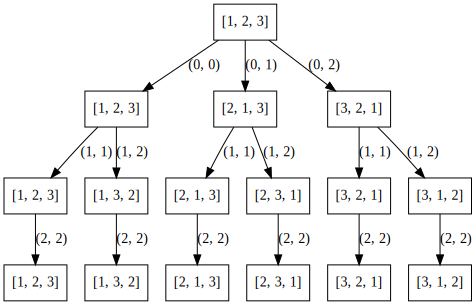

In [148]:
from graphviz import Digraph
dot = Digraph(comment='The Round Table', format='png')
dot.node_attr['shape']='box'
#print(get_methods(Digraph))
#print(Digraph.__dict__)
nodes = ['[1, 2, 3]', '[1, 2, 3]', '[2, 1, 3]', '[3, 2, 1]', '[1, 2, 3]', '[1, 3, 2]', '[2, 1, 3]', '[2, 3, 1]', '[3, 2, 1]', '[3, 1, 2]', 
         '[1, 2, 3]', '[1, 3, 2]', '[2, 1, 3]', '[2, 3, 1]', '[3, 2, 1]', '[3, 1, 2]']
for i, node in enumerate(nodes):
  dot.node(str(i), label=node)
edges = [('0', '1', '(0, 0)'), ('0', '2', '(0, 1)'), ('0', '3', '(0, 2)'), ('1', '4', '(1, 1)'), ('1', '5', '(1, 2)'), ('2', '6', '(1, 1)'), ('2', '7', '(1, 2)'), 
         ('3', '8', '(1, 1)'), ('3', '9', '(1, 2)'), ('4', '10', '(2, 2)'), ('5', '11', '(2, 2)'), ('6', '12', '(2, 2)'), ('7', '13', '(2, 2)'), 
         ('8', '14', '(2, 2)'), ('9', '15', '(2, 2)')]
for n1, n2, l in edges:
  dot.edge(n1, n2,  _attributes={'label': l})
# dot.edge('0', '1', _attributes={'label': '4'})
# dot.edge('S', 'B', _attributes={'label': '5'})
# dot.edge('A', 'G', _attributes={'label': '7'})
# dot.edge('B', 'G', _attributes={'label': '3'})
dot.render('test-output/permutation_swap', view=True) 

dot

In [0]:
# permutation by swapping
ans = []
def permutate(a, d):
  global ans
  
  if d == len(a):
    ans.append(a[::])
  for i in range(d, len(a)):
    a[i], a[d] = a[d], a[i]
    print(a, '(', d, i, ')')
    permutate(a, d+1)
    a[i], a[d] = a[d], a[i]
  return

In [150]:
a = [1, 2, 3]
permutate(a, 0)
ans

[1, 2, 3] ( 0 0 )
[1, 2, 3] ( 1 1 )
[1, 2, 3] ( 2 2 )
[1, 3, 2] ( 1 2 )
[1, 3, 2] ( 2 2 )
[2, 1, 3] ( 0 1 )
[2, 1, 3] ( 1 1 )
[2, 1, 3] ( 2 2 )
[2, 3, 1] ( 1 2 )
[2, 3, 1] ( 2 2 )
[3, 2, 1] ( 0 2 )
[3, 2, 1] ( 1 1 )
[3, 2, 1] ( 2 2 )
[3, 1, 2] ( 1 2 )
[3, 1, 2] ( 2 2 )


[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 2, 1], [3, 1, 2]]

When there are duplicates, for example, 
https://www.geeksforgeeks.org/distinct-permutations-string-set-2/

In [0]:
# permutation by swapping and there might be having duplicates
ans = []
def checkSwap(a, d, cur):
  for i in range(d, cur):
    if a[i] == a[cur]:
      return False
  return True
def permutate(a, d):
  global ans
  if d == len(a):
    ans.append(a[::])
  for i in range(d, len(a)):
    if not checkSwap(a, d, i):
      continue
    a[i], a[d] = a[d], a[i]
    permutate(a, d+1)
    a[i], a[d] = a[d], a[i]
  return

In [152]:
a = [1,2, 2, 3]
permutate(a, 0)
ans

[[1, 2, 2, 3],
 [1, 2, 3, 2],
 [1, 3, 2, 2],
 [2, 1, 2, 3],
 [2, 1, 3, 2],
 [2, 2, 1, 3],
 [2, 2, 3, 1],
 [2, 3, 2, 1],
 [2, 3, 1, 2],
 [3, 2, 2, 1],
 [3, 2, 1, 2],
 [3, 1, 2, 2]]

#### Questions to ponder
1. What if there are duplicates in the input list? How to count and how to enumerate all possible permutations? [1, 2, 3, 2]

We have a way to count:
\begin{align}
\frac{P(n, n)}{c_1!c_2!...}
\end{align}

Resources
* https://www.cs.sfu.ca/~ggbaker/zju/math/perm-comb-more.html

[47. Permutations II](https://leetcode.com/problems/permutations-ii/)

* first sort it as [1, 2, 2, 3]. We can draw the process
```
{}
i=0: {1}, {2}, *{2}*,  {3} = 3
i=1: {1, 2}, *{1, 2}*,  {1, 3}, {2, 1}, {2, 2}, {2, 3}, {3, 1}, {3,2}, *{3, 2}*
i=2: {1, 2, 2}, {1, 2, 3}, 
```
Exactlyt the same process except that we skip the duplicates. 
We can not find a recurrence relation to this. This depends on how many duplicates we have. 



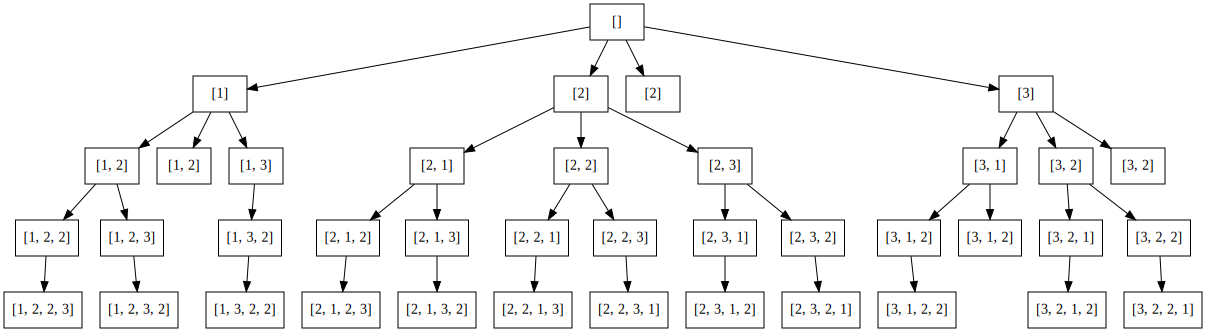

In [153]:
from graphviz import Digraph
dot = Digraph(comment='The Round Table', format='png')
dot.node_attr['shape']='box'
#print(get_methods(Digraph))
#print(Digraph.__dict__)
nodes = [('0', '[]'), ('1', '[1]'), ('2', '[2]'), ('3', '[2]'), ('4', '[3]'), 
         ('5', '[1, 2]'), ('6', '[1, 2]'), ('7', '[1, 3]'), 
         ('8', '[2, 1]'), ('9', '[2, 2]'), ('10', '[2, 3]'), 
         ('11', '[3, 1]'), ('12', '[3, 2]'), ('12_1', '[3, 2]'), 
         ('13', '[1, 2, 2]'), ('14', '[1, 2, 3]'), 
         ('15', '[1, 3, 2]'), 
         ('16', '[2, 1, 2]'), ('17', '[2, 1, 3]'),
         ('18', '[2, 2, 1]'), ('19', '[2, 2, 3]'),
         ('20', '[2, 3, 1]'), ('21', '[2, 3, 2]'),
         ('22', '[3, 1, 2]'), ('22_1', '[3, 1, 2]') ,
         ('23', '[3, 2, 1]'), ('24', '[3, 2, 2]'),
         ('25', '[1, 2, 2, 3]'), 
         ('26', '[1, 2, 3, 2]'), 
         ('27', '[1, 3, 2, 2]'), 
         ('28', '[2, 1, 2, 3]'), 
         ('29', '[2, 1, 3, 2]'),
         ('30', '[2, 2, 1, 3]'), 
         ('31', '[2, 2, 3, 1]'), 
         ('32', '[2, 3, 1, 2]'), 
         ('33', '[2, 3, 2, 1]'), 
         ('34', '[3, 1, 2, 2]'), 
         ('35', '[3, 2, 1, 2]'), 
         ('36', '[3, 2, 2, 1]')]
for i, node in nodes:
  dot.node(i, label=node)
edges = [('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'),
         ('1', '5'), ('1', '6'), ('1', '7'),
         ('2', '8'), ('2', '9'), ('2', '10'),
         ('4', '11'), ('4', '12'),('4', '12_1'),
         ('5', '13'), ('5', '14'),
         ('7', '15'),
         ('8', '16'), ('8', '17'),
         ('9', '18'), ('9', '19'),
         ('10', '20'), ('10', '21'),
         ('11', '22'), ('11', '22_1'),
         ('12', '23'),('12', '24'),
         ('13', '25'),('14', '26'), ('15', '27'),('16', '28'), ('17', '29'),('18', '30'), 
         ('19', '31'),('20', '32'), ('21', '33'),('22', '34'), ('23', '35'),('24', '36')]
for n1, n2 in edges:
  dot.edge(n1, n2)
# dot.edge('0', '1', _attributes={'label': '4'})
# dot.edge('S', 'B', _attributes={'label': '5'})
# dot.edge('A', 'G', _attributes={'label': '7'})
# dot.edge('B', 'G', _attributes={'label': '3'})
dot.render('test-output/permutation_repeat', view=True) 

dot

In [0]:
from collections import Counter
def permuteDup(nums, k):
    ans = []
    def permutate(d, n, k, curr, tracker):  
      nonlocal ans 
      if d == k:
          ans.append(curr)
          return
      for i in range(n):
          if tracker[nums[i]] == 0:
            #print('continue')
            continue
          if i - 1 >= 0 and nums[i] == nums[i-1]:
              continue
          tracker[nums[i]] -= 1
          curr.append(nums[i])
          #print(curr)
          permutate(d+1, n, k, curr[:], tracker)
          curr.pop()
          tracker[nums[i]] += 1
      return
    
    nums.sort()
    permutate(0, len(nums), k, [], Counter(nums))
    return ans


In [155]:
nums = [1,2, 2, 3]
ans = permuteDup(nums, 4)
print(len(ans), ans)

12 [[1, 2, 2, 3], [1, 2, 3, 2], [1, 3, 2, 2], [2, 1, 2, 3], [2, 1, 3, 2], [2, 2, 1, 3], [2, 2, 3, 1], [2, 3, 1, 2], [2, 3, 2, 1], [3, 1, 2, 2], [3, 2, 1, 2], [3, 2, 2, 1]]


### Combination

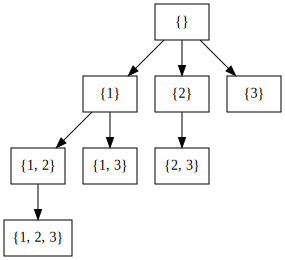

In [156]:
from graphviz import Digraph
dot = Digraph(comment='The Round Table', format='png')
dot.node_attr['shape']='box'
#print(get_methods(Digraph))
#print(Digraph.__dict__)
nodes = ['{}', '{1}', '{2}', '{3}', '{1, 2}', '{1, 3}',  '{2, 3}',  '{1, 2, 3}']
for i, node in enumerate(nodes):
  dot.node(str(i), label=node)
edges = [('0', '1'), ('0', '2'), ('0', '3'), ('1', '4'), ('1', '5'), ('2', '6'), ('4', '7')]
for n1, n2 in edges:
  dot.edge(n1, n2)
dot.render('test-output/combination', view=True) 
dot

In [0]:
def C_n_k(a, n, k, start, d, curr, ans):
  '''
  Implement combination of k items out  of n items
  start: the start of candinate
  depth: start from 0, and represent the depth of the search
  curr: the current partial solution
  ans: collect all the valide solutions
  '''
  if d == k: #end condition
    ans.append(curr[::]) 
    return
  
  for i in range(start, n):    
    # generate the next solution from curr
    curr.append(a[i])
    # move to the next solution
    C_n_k(a, n, k, i+1, d+1, curr, ans)

    #backtrack to previous partial state
    curr.pop()
  return

In [158]:
a = [1, 2, 3]
n = len(a)
ans = []
a.sort()
C_n_k(a, n, 2, 0, 0, [], ans)
print(ans, a)

[[1, 2], [1, 3], [2, 3]] [1, 2, 3]


In [0]:
def powerset(a, n, d, curr, ans):
  if d == n:
    ans.append(curr[::]) 
    return

  # Case 1: select item
  curr.append(a[d])
  powerset(a, n, d + 1, curr, ans)
  # Case 2: not select item
  curr.pop()
  powerset(a, n, d + 1, curr, ans)
  return

In [160]:
a = [1, 2, 3]
n = len(a)
ans = []
powerset(a, n, 0, [], ans)
ans

[[1, 2, 3], [1, 2], [1, 3], [1], [2, 3], [2], [3], []]

#### Questions to ponder
1. What if there are duplicates in the input list? How to count and how to enumerate all possible combinations? [1, 2, 3, 2]


Take the product of all the (frequencies + 1).

For example, in {A,B,B}, the answer is (1+1) [the number of As] * (2+1) [the number of Bs] = 6.

In the second example, count(A) = 2 and count(B) = 2. Thus the answer is (2+1) * (2+1) = 9.

The reason this works is that you can define any subset as a vector of counts - for {A,B,B}, the subsets can be described as {A=0,B=0}, {A=0,B=1}, {0,2}, {1,0}, {1,1}, {1,2}.

For each number in counts[] there are (frequencies of that object + 1) possible values. (0..frequencies)

Therefore, the total number of possiblities is the product of all (frequencies+1).

The "all unique" case can also be explained this way - there is one occurence of each object, so the answer is (1+1)^|S| = 2^|S|.

However, how to count the case of $c(n, k)$? Assume we have $m$ unqiue items, and the frequency of each is marked as $x_i$, with $\sum_{i=0}^{m-1}x_i = n$. 
\begin{align}
\sum_{k=0}^{n} c(n, k) = \prod_{i=0}^{m-1}(x_i + 1)
\end{align}

When the maximum of $k$ is 0.
\begin{align}
\sum_{k=0}^{0} c(n, k) = \prod_{i=0}^{m-1}(1) = 1
\end{align}

When the maximum of $k$ is 1.
\begin{align}
\sum_{k=0}^{1} c(n, k) = \prod_{i=0}^{m-1}(1) = 1
\end{align}

We list each as follows:
```
c(n,0)
```

Notes:
* http://www.math.ucsd.edu/~ebender/CombText/ch-1.pdf
* https://math.stackexchange.com/questions/1506536/counting-tuples-with-repetitions


In [0]:
def C_n_k(a, n, k, start, depth, curr, ans):
  '''
  Implement combination of k items out  of n items
  start: the start of candinate
  depth: start from 0, and represent the depth of the search
  curr: the current partial solution
  ans: collect all the valide solutions
  '''
  ans.append(curr[::])
  if depth == k: #end condition
    return
  
  for i in range(start, n): 
    if i - 1 >= start and a[i] == a[i-1]:
              continue   
    # generate the next solution from curr
    curr.append(a[i])
    # move to the next solution
    C_n_k(a, n, k, i+1, depth+1, curr, ans)
    curr.pop()
  return

In [162]:
a = [1, 2, 3, 2]
n = len(a)
ans = [[None]]
ans = []
a.sort()
C_n_k(a, n, 4, 0, 0, [], ans)
ans, len(ans)

([[],
  [1],
  [1, 2],
  [1, 2, 2],
  [1, 2, 2, 3],
  [1, 2, 3],
  [1, 3],
  [2],
  [2, 2],
  [2, 2, 3],
  [2, 3],
  [3]],
 12)

### More Combinatorics

#### All paths

In [0]:
def all_paths(g, s, path, ans):
  '''generate all pahts with backtrack'''
  ans.append(path[::])
  for v in g[s]:
    path.append(v)
    print(path)
    all_paths(g, v, path, ans)
    path.pop()
    print(path, 'backtrack')

In [164]:
al = [[1, 2], [2, 3, 4], [5], [], [], []]
print(al)

[[1, 2], [2, 3, 4], [5], [], [], []]


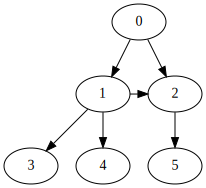

In [165]:
dot = Digraph(comment='The Round Table', format='png')
nodes = range(len(al))
for idx, neighbors in enumerate(al):
  for n in neighbors:
      dot.edge(str(idx), str(n))
rank1 = [0]
rank2 = [1, 2]
rank3 = [3, 4, 5]
for rank in [rank1, rank2, rank3]:
  with dot.subgraph() as s:
    s.attr(rank='same')
    for node in rank:
      s.node(str(node))
dot.render('test-output/all_path_demo', view=True) 
dot

In [166]:
ans = []
path = [0]
all_paths(al, 0, path, ans)
for path in ans:
  path = [str(i) for i in path]
  print('->'.join(path), end = ', ')

[0, 1]
[0, 1, 2]
[0, 1, 2, 5]
[0, 1, 2] backtrack
[0, 1] backtrack
[0, 1, 3]
[0, 1] backtrack
[0, 1, 4]
[0, 1] backtrack
[0] backtrack
[0, 2]
[0, 2, 5]
[0, 2] backtrack
[0] backtrack
0, 0->1, 0->1->2, 0->1->2->5, 0->1->3, 0->1->4, 0->2, 0->2->5, 

#### Subsequences

* Sequence is unique
* String has repetition: 940. Distinct Subsequences II

The enumeration with backtacking is quite similar to the combination, other than in the case with repetition. In our previous implementation of enumerating unique combinations when there are duplciates in the input, we have sorted the items, making the checking of repetition of choices as simple as checking the precessor. 

In [0]:
#Counting
 def distinctSubseqII(S):
    dp = [1]
    last = {}
    for i, x in enumerate(S):
        dp.append(dp[-1] * 2)
        if x in last:
            dp[-1] -= dp[last[x]]
        last[x] = i

    return (dp[-1] - 1) % (10**9 + 7)

In [168]:
S = 'abaab'
distinctSubseqII(S)

17

In [0]:
#Enumerating
def check_repetition(start, i, a):
  for j in range(start, i):
    if a[i] == a[j]:
      return True
  return False

def subseqs(a, n, start, curr, ans):
  ans.append(''.join(curr[::])) 
  if start == n: 
    return
  
  for i in range(start, n):  
    if check_repetition(start, i, a):
      continue    
    curr.append(a[i])
    subseqs(a, n, i+1, curr, ans)
    curr.pop()
  return

In [0]:
from graphviz import Graph
dot = Graph(comment='The Round Table', format='png')
dot.node_attr['shape']='ellipse'
dot.node('0', label='<\'\''+'<FONT POINT-SIZE="12">, s={}</FONT>>'.format(0))
count = 0

def subseqs(a, n, start, curr, ans, node_label):
  global count
  ans.append(''.join(curr[::])) 
  if start == n: 
    return
  
  for i in range(start, n):  
    node = curr + [a[i]]
    count += 1
    dot.node(str(count), label='<\''+''.join(node)+'\''+'<FONT POINT-SIZE="12">, s={}</FONT>>'.format(i+1))
    dot.edge(node_label, str(count), _attributes={ 'label':'i={}'.format(i)})
    if check_repetition(start, i, a):
      dot.node(str(count), label='\''+''.join(node)+'\'', _attributes={'color': 'red'})
      continue   
    curr.append(a[i])
    subseqs(a, n, i+1, curr, ans, str(count))
    curr.pop()
    #count -= 1
  return

14 ['', '1', '12', '123', '1232', '122', '13', '132', '2', '23', '232', '22', '3', '32']


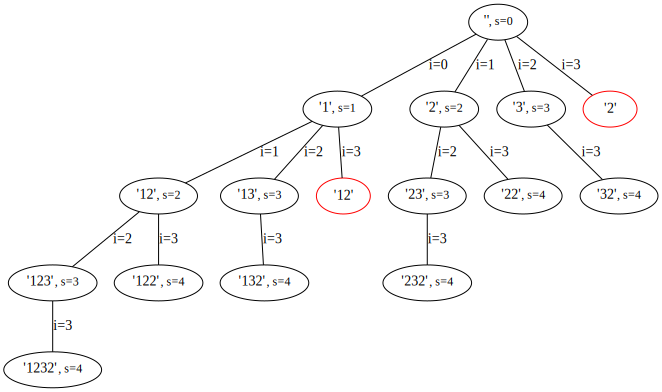

In [171]:
S = '1232'
ans = []
subseqs(list(S), len(S), 0,  [], ans, '0')
print(len(ans), ans)
dot.render('test-output/subsequence', view=True) 
dot

#### Partition

## Constraint Satisfaction Problems with Backtracking and Pruning

### Sudoku Solver
[Search space](https://www.researchgate.net/publication/264572573_Sudoku_Puzzle_Complexity)

First, we build up the board

In [0]:
board = [[5, 3, None, None, 7, None, None, None, None],
         [6, None, None, 1, 9, 5, None, None, None],
         [None, 9, 8, None, None, None, None, 6, None],
         [8, None, None, None, 6, None, None, None, 3], 
         [4, None, None, 8, None, 3, None, None, 1], 
         [7, None, None, None, 2, None, None, None, 6], 
         [None, 6, None, None, None, None, 2, 8, None], 
         [None, None, None, 4, 1, 9, None, None, 5],
         [None, None, None, None, 8, None, None, 7, 9]]

Define how to change the state

In [0]:
def setState(i, j, v, row_state, col_state, grid_state):
  row_state[i] |= 1 << v
  col_state[j] |= 1 << v
  grid_index = (i//3)*3 + (j//3)
  grid_state[grid_index] |= 1 << v
  
def resetState(i, j, v, row_state, col_state, grid_state):
  row_state[i] &= ~(1 << v)
  col_state[j] &= ~(1 << v)
  grid_index = (i//3)*3 + (j//3)
  grid_state[grid_index] &= ~(1 << v)
  
def checkState(i, j, v, row_state, col_state, grid_state):
  row_bit = (1 << v) & row_state[i] != 0
  col_bit = (1 << v) & col_state[j]  != 0
  grid_index = (i//3)*3 + (j//3)
  grid_bit = (1 << v) & grid_state[grid_index]  != 0
  return not row_bit and not col_bit and not grid_bit

Get the empty spots and its values

In [0]:
 def getEmptySpots(board, rows, cols, row_state, col_state, grid_state): 
    ''' get empty spots and find its corresponding values in O(n*n)'''
    empty_spots = {}
    # initialize the state, and get empty spots
    for i in range(rows):
      for j in range(cols):
        if board[i][j]:
            # set that bit to 1
            setState(i, j, board[i][j]-1, row_state, col_state, grid_state)          
        else:
            empty_spots[(i,j)] = []
                    
    # get possible values for each spot
    for i, j in empty_spots.keys():
      for v in range(9):
        if checkState(i, j, v, row_state, col_state, grid_state):
          empty_spots[(i, j)].append(v+1)
          
    return empty_spots

Second, we intialize the state and find empty spots. 

In [175]:
# initialize state
row_state = [0]*9
col_state = [0]*9
grid_state = [0]*9

empty_spots = getEmptySpots(board, 9, 9, row_state, col_state, grid_state)
print(row_state, col_state, grid_state) 
sorted_empty_spots = sorted(empty_spots.items(), key=lambda x: len(x[1]))
print(sorted_empty_spots)

[84, 305, 416, 164, 141, 98, 162, 281, 448] [248, 292, 128, 137, 483, 276, 2, 224, 309] [436, 337, 32, 200, 166, 37, 32, 393, 466]
[((4, 4), [5]), ((6, 5), [7]), ((6, 8), [4]), ((7, 7), [3]), ((0, 3), [2, 6]), ((2, 0), [1, 2]), ((2, 3), [2, 3]), ((2, 4), [3, 4]), ((2, 5), [2, 4]), ((4, 1), [2, 5]), ((5, 1), [1, 5]), ((5, 3), [5, 9]), ((5, 5), [1, 4]), ((6, 4), [3, 5]), ((7, 0), [2, 3]), ((7, 6), [3, 6]), ((8, 5), [2, 6]), ((0, 2), [1, 2, 4]), ((0, 8), [2, 4, 8]), ((1, 1), [2, 4, 7]), ((1, 2), [2, 4, 7]), ((1, 7), [2, 3, 4]), ((2, 8), [2, 4, 7]), ((3, 1), [1, 2, 5]), ((3, 3), [5, 7, 9]), ((3, 5), [1, 4, 7]), ((4, 6), [5, 7, 9]), ((4, 7), [2, 5, 9]), ((5, 7), [4, 5, 9]), ((6, 0), [1, 3, 9]), ((6, 3), [3, 5, 7]), ((7, 1), [2, 7, 8]), ((7, 2), [2, 3, 7]), ((8, 0), [1, 2, 3]), ((0, 5), [2, 4, 6, 8]), ((0, 6), [1, 4, 8, 9]), ((0, 7), [1, 2, 4, 9]), ((1, 6), [3, 4, 7, 8]), ((1, 8), [2, 4, 7, 8]), ((3, 2), [1, 2, 5, 9]), ((3, 6), [4, 5, 7, 9]), ((3, 7), [2, 4, 5, 9]), ((4, 2), [2, 5, 6, 9]), (

Traverse the empty_spots, and fill in. 

In [0]:
def dfs_backtrack(empty_spots, index):
  if index == len(empty_spots):
    return True
  (i, j), vl = empty_spots[index]
  
  for v in vl: #try each value
    # check the state
    if checkState(i, j, v-1, row_state, col_state, grid_state):
      # set the state
      setState(i, j, v-1, row_state, col_state, grid_state)
      # mark the board
      board[i][j] = v
      if dfs_backtrack(empty_spots, index+1):
        return True
      else:
        #backtack to previouse state
        resetState(i, j, v-1, row_state, col_state, grid_state)
        #unmark the board
        board[i][j] = None
  return False

In [0]:
from graphviz import Digraph
dot = Digraph(comment='The Round Table', format='png')
dot.node_attr['shape']='ellipse'
dot.node(str((-1, -1)), label=str((-1, -1)))
count = 0
def dfs_backtrack(empty_spots, index, last_node):
  global count
  if index == len(empty_spots):
    return True
  (i, j), vl = empty_spots[index]
  ni, nj = -1, -1
  if index + 1 < len(empty_spots):
    (ni, nj), nvl = empty_spots[index + 1]

  for v in vl: #try each value
    # check the state
    if checkState(i, j, v-1, row_state, col_state, grid_state):

      cur_node = str((ni, nj, v))
      dot.node(str((ni, nj, v)), label=str((ni, nj))) # label shows, first is index
      dot.edge(last_node, str((ni, nj, v)), label=str(v))
      # set the state
      setState(i, j, v-1, row_state, col_state, grid_state)
      # mark the board
      board[i][j] = v
      if dfs_backtrack(empty_spots, index+1, cur_node):
        count -= 1
        return True
      else:
        #backtack to previouse state
        count -= 1
        resetState(i, j, v-1, row_state, col_state, grid_state)
        dot.edge(str((ni, nj, v)), last_node, label=str(v), _attributes={'color': 'red'})
        #unmark the board
        board[i][j] = None
  return False

In [178]:
ans = dfs_backtrack(sorted_empty_spots, 0, str((-1, -1)))
print(ans)
print(board)
# dot.render('test-output/sudoku_search_tree', view=True) 
# dot

True
[[5, 3, 4, 6, 7, 8, 9, 1, 2], [6, 7, 2, 1, 9, 5, 3, 4, 8], [1, 9, 8, 3, 4, 2, 5, 6, 7], [8, 5, 9, 7, 6, 1, 4, 2, 3], [4, 2, 6, 8, 5, 3, 7, 9, 1], [7, 1, 3, 9, 2, 4, 8, 5, 6], [9, 6, 1, 5, 3, 7, 2, 8, 4], [2, 8, 7, 4, 1, 9, 6, 3, 5], [3, 4, 5, 2, 8, 6, 1, 7, 9]]


#### Arbitray variables ordering VS minimal domain first ordering

In [0]:
from copy import deepcopy
import time
class SudokoSolver():
  def __init__(self, board):
    self.original_board = deepcopy(board)
    self.board = deepcopy(board)
    self.n = len(board)
    assert (self.n == len(board[0]))
    # initialize state
    self.row_state = [0]*self.n
    self.col_state = [0]*self.n
    self.grid_state = [0]*self.n
    
  def _setState(self, i, j, v):
    self.row_state[i] |= 1 << v
    self.col_state[j] |= 1 << v
    grid_index = (i//3)*3 + (j//3)
    self.grid_state[grid_index] |= 1 << v
  
  def _resetState(self, i, j, v):
    self.row_state[i] &= ~(1 << v)
    self.col_state[j] &= ~(1 << v)
    grid_index = (i//3)*3 + (j//3)
    self.grid_state[grid_index] &= ~(1 << v)
  
  def _checkState(self, i, j, v):
    row_bit = (1 << v) & self.row_state[i] != 0
    col_bit = (1 << v) & self.col_state[j]  != 0
    grid_index = (i//3)*3 + (j//3)
    grid_bit = (1 << v) & self.grid_state[grid_index]  != 0
    return not row_bit and not col_bit and not grid_bit
  
  def reset(self):
    # initialize state
    self.row_state = [0]*self.n
    self.col_state = [0]*self.n
    self.grid_state = [0]*self.n
    self.board = deepcopy(self.original_board)
  
  def _getEmptySpots(self): 
    ''' get empty spots and find its corresponding values in O(n*n)'''
    empty_spots = {}
    # initialize the state, and get empty spots
    for i in range(self.n):
      for j in range(self.n):
        if self.board[i][j]:
            # set that bit to 1
            self._setState(i, j, self.board[i][j]-1)          
        else:
            empty_spots[(i,j)] = []
                    
    # get possible values for each spot
    for i, j in empty_spots.keys():
      for v in range(self.n):
        if self._checkState(i, j, v):
          empty_spots[(i, j)].append(v+1)
          
    return empty_spots
  
  def helper(self, empty_spots, index):
    if index == len(empty_spots):
      return True
    (i, j), vl = empty_spots[index]
  
    for v in vl: #try each value
      # check the state
      if self._checkState(i, j, v-1):
        # set the state
        self._setState(i, j, v-1)
        # mark the board
        self.board[i][j] = v
        if self.helper(empty_spots, index+1):
          return True
        else:
          #backtack to previouse state
          self._resetState(i, j, v-1)
          #unmark the board
          self.board[i][j] = None
    return False
  
  def backtrackSolver(self):
    self.reset()
    empty_spots = self._getEmptySpots()
    empty_spots = [(k, v) for k, v in empty_spots.items() ]
    t0 = time.time()
    ans = self.helper(empty_spots, 0)
    print('total time: ', time.time() - t0)
    return ans
  
  def backtrackSolverSorted(self):
    self.reset()
    empty_spots = self._getEmptySpots()
    empty_spots = sorted(empty_spots.items(), key=lambda x: len(x[1]))
    t0 = time.time()
    ans = self.helper(empty_spots, 0)
    print('sorted total time: ', time.time() - t0)
    return ans

In [180]:
board = [[5, 3, None, None, 7, None, None, None, None],
         [6, None, None, 1, 9, 5, None, None, None],
         [None, 9, 8, None, None, None, None, 6, None],
         [8, None, None, None, 6, None, None, None, 3], 
         [4, None, None, 8, None, 3, None, None, 1], 
         [7, None, None, None, 2, None, None, None, 6], 
         [None, 6, None, None, None, None, 2, 8, None], 
         [None, None, None, 4, 1, 9, None, None, 5],
         [None, None, None, None, 8, None, None, 7, 9]]
solver = SudokoSolver(board)
solver.backtrackSolver()
solver.backtrackSolverSorted()

total time:  0.02195119857788086
sorted total time:  0.00042724609375


True

#### Implementation

In [0]:
from copy import deepcopy
class Sudoku():
  def __init__(self, board):
    self.org_board = deepcopy(board)
    self.board = deepcopy(board)
    
  def init(self):
    self.A = set([i for i in range(1,10)])
    self.row_state = [set() for i in range(9)]
    self.col_state = [set() for i in range(9)]
    self.block_state = [[set() for i in range(3)] for i in range(3)]
    self.unfilled = []

    for i in range(9):
      for j in range(9):
          c = self.org_board[i][j]
          if c == 0:
              self.unfilled.append((i, j))
          else:
              self.row_state[i].add(c)
              self.col_state[j].add(c)
              self.block_state[i//3][j//3].add(c)
  
  def set_state(self, i, j, c):
    self.board[i][j] = c
    self.row_state[i].add(c)
    self.col_state[j].add(c)
    self.block_state[i//3][j//3].add(c)
    
  def reset_state(self, i, j, c):
    self.board[i][j] = 0
    self.row_state[i].remove(c)
    self.col_state[j].remove(c)
    self.block_state[i//3][j//3].remove(c)
    
  def _ret_len(self, args):
    i, j = args
    option = self.A - (self.row_state[i] | self.col_state[j] | self.block_state[i//3 ][j//3])
    return len(option)
              
  def solve(self):
    '''implement solver restricted spot selection and look ahead'''
    if len(self.unfilled) == 0:
      return True
    i, j = min(self.unfilled, key = self._ret_len)
    option = self.A - (self.row_state[i] | self.col_state[j] | self.block_state[i//3 ][j//3])
    #print(option)
    if len(option) == 0:
      return False
    self.unfilled.remove((i, j))
    for c in option:
      self.set_state(i, j, c)
      if self.solve():
        return True
      else:
        self.reset_state(i, j, c)
    # no candidate is valid, backtrack
    self.unfilled.append((i, j))
    return False
  
  def naive_solve(self):
    '''implement naitve solver without restricted spot selection or look ahead'''
    if len(self.unfilled) == 0:
      return True
    i, j = self.unfilled.pop()
    option = self.A - (self.row_state[i] | self.col_state[j] | self.block_state[i//3 ][j//3])
    for c in option:
      self.set_state(i, j, c)
      if self.naive_solve():
        return True
      else:
        self.reset_state(i, j, c)
    # no candidate is valid, backtrack
    self.unfilled.append((i, j))
    return False
  
  
      
      

In [0]:
board_easy = [[5, 3, 0, 0, 7, 0, 0, 0, 0],
         [6, 0, 0, 1, 9, 5, 0, 0, 0],
         [0, 9, 8, 0, 0, 0, 0, 6, 0],
         [8, 0, 0, 0, 6, 0, 0, 0, 3], 
         [4, 0, 0, 8, 0, 3, 0, 0, 1], 
         [7, 0, 0, 0, 2, 0, 0, 0, 6], 
         [0, 6, 0, 0, 0, 0, 2, 8, 0], 
         [0, 0, 0, 4, 1, 9, 0, 0, 5],
         [0, 0, 0, 0, 8, 0, 0, 7, 9]]

board_hard = [[3, 8, 0, 0, 0, 4, 0, 0, 0],
         [0, 0, 5, 0, 0, 0, 0, 1, 0],
         [0, 0, 1, 5, 0, 0, 0, 7, 0],
         [2, 0, 7, 0, 0, 5, 0, 0, 4],  
         [0, 0, 0, 6, 7, 9, 0, 0, 0], 
         [8, 0, 0, 1, 0, 0, 7, 0, 6],
         [0, 5, 0, 0, 0, 8, 2, 0, 0], 
         [0, 4, 0, 0, 0, 0, 5, 0, 0],
         [0, 0, 0, 2, 0, 0, 0, 4, 1]]

# board_evil = [[0, 0, 0, 7, 0, 0, 0, 0, 4],
#               [8, 0, 0, 0, 0, 6, 0, 0, 0],
#               [6, 0, 0, 0, 9, 8, 7, 0, 0],
#               [0, 4, 0, 0, 6, 0, 9, 0, 7],  
#               [0, 9, 0, 0, 0, 0, 0, 1, 0], 
#               [1, 0, 8, 0, 2, 0, 0, 3, 0],
#               [0, 0, 3, 5, 4, 0, 0, 0, 8], 
#               [0, 0, 0, 1, 0, 0, 0, 0, 5],
#               [2, 0, 0, 0, 0, 9, 0, 0, 0]]

In [183]:
for board in [board_easy, board_hard]:
  solver = Sudoku(board)

  import time
  t0 = time.time()
  solver.init()
  solver.naive_solve()
  print(solver.board)
  print('total time using naive solver: ', time.time()-t0, 's')

  t0 = time.time()
  solver.init()
  solver.solve()
  print(solver.board)
  print('total time using smart solver: ', time.time()-t0, 's')

[[5, 3, 4, 6, 7, 8, 9, 1, 2], [6, 7, 2, 1, 9, 5, 3, 4, 8], [1, 9, 8, 3, 4, 2, 5, 6, 7], [8, 5, 9, 7, 6, 1, 4, 2, 3], [4, 2, 6, 8, 5, 3, 7, 9, 1], [7, 1, 3, 9, 2, 4, 8, 5, 6], [9, 6, 1, 5, 3, 7, 2, 8, 4], [2, 8, 7, 4, 1, 9, 6, 3, 5], [3, 4, 5, 2, 8, 6, 1, 7, 9]]
total time using naive solver:  0.005067586898803711 s
[[5, 3, 4, 6, 7, 8, 9, 1, 2], [6, 7, 2, 1, 9, 5, 3, 4, 8], [1, 9, 8, 3, 4, 2, 5, 6, 7], [8, 5, 9, 7, 6, 1, 4, 2, 3], [4, 2, 6, 8, 5, 3, 7, 9, 1], [7, 1, 3, 9, 2, 4, 8, 5, 6], [9, 6, 1, 5, 3, 7, 2, 8, 4], [2, 8, 7, 4, 1, 9, 6, 3, 5], [3, 4, 5, 2, 8, 6, 1, 7, 9]]
total time using smart solver:  0.002804994583129883 s
[[3, 8, 6, 7, 1, 4, 9, 2, 5], [4, 7, 5, 9, 2, 3, 6, 1, 8], [9, 2, 1, 5, 8, 6, 4, 7, 3], [2, 6, 7, 8, 3, 5, 1, 9, 4], [5, 1, 4, 6, 7, 9, 8, 3, 2], [8, 3, 9, 1, 4, 2, 7, 5, 6], [1, 5, 3, 4, 9, 8, 2, 6, 7], [7, 4, 2, 3, 6, 1, 5, 8, 9], [6, 9, 8, 2, 5, 7, 3, 4, 1]]
total time using naive solver:  0.029914140701293945 s
[[3, 8, 6, 7, 1, 4, 9, 2, 5], [4, 7, 5, 9, 2, 3, 

## Combinatorial Optimization Problems
* [Resources](https://www.coursera.org/learn/discrete-optimization/lecture/n2TGL/knapsack-1-intuition)

### Travelling Salesman Problem

Resources:

* [notes](https://www.mathematics.pitt.edu/sites/default/files/TSP.pdf)

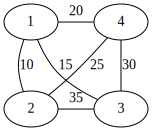

In [184]:
from graphviz import Graph
dot = Graph(comment='The Round Table', format='png')
dot.node_attr['shape']='ellipse'
# nodes = ['1', '2', '3', '4']
# for n in nodes:
#   dot.node(n)
dot.edge('1', '2', label=str(10))
dot.edge('1', '3', label=str(15))
dot.edge('1', '4', label=str(20))
dot.edge('2', '4', label=str(25))
dot.edge('3', '4', label=str(30))
dot.edge('2', '3', label=str(35))

rank1 = [1, 4]
rank2 = [2, 3]
rank3 = [2, 3]
for rank in [rank1, rank2]:
  with dot.subgraph() as s:
    s.attr(rank='same')
    for node in rank:
      s.node(str(node))
dot.render('test-output/tsp_graph', view=True) 
dot


![alt text](https://www.geeksforgeeks.org/wp-content/uploads/Euler12.png)

[         0          1          8         81       1024      15625
     279936    5764801  134217728 3486784401]
[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]


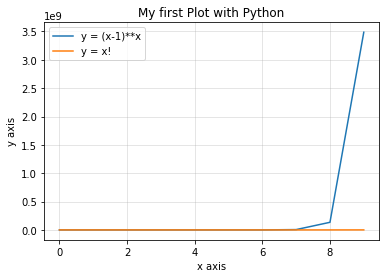

In [185]:
# Import our modules that we are using
import matplotlib.pyplot as plt
import numpy as np
import math

# Create the vectors X and Y
x = np.array(range(10))
y = (x)**(x+1)
y2= [math.factorial(i) for i in x]
print(y)
print(y2)

# Create the plot
plt.plot(x,y, label='y = (x-1)**x')
plt.plot(x, y2, label='y = x!')

# Add a title
plt.title('My first Plot with Python')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('y axis')

# Add a grid
plt.grid(alpha=.4,linestyle='-')

# Add a Legend
plt.legend()

# Show the plot
plt.show()

In [0]:
g = [[(1, 10), (2, 15), (3, 20)], 
   [(0, 10), (2, 35),(3,25)],
   [(0, 15),(1,35),(3,30)],
   [(0,20),(1,25),(2,30)]]

In [0]:
# Implemented with graph search
def tsp(g, cur, path, mincost, cost, bused, ans):
  if len(path) == len(g): # we can only choose 0
    cost += g[cur][0][1]
    if cost < mincost[0]:
      mincost[0] = cost
      ans[0] = path[::]
    return
  for v, c in g[cur]:
    # constraint on permutation and cost    
    if (not bused[v]) and (cost + c < mincost[0]):
        bused[v] = True
        path.append(v)
        cost += c
        tsp(g, v, path, mincost, cost, bused, ans)
        bused[v] = False
        path.pop()
        cost -= c
  return

In [188]:
import sys
cv = 0
path = [0]
mincost = [sys.maxsize]
cost = 0
bused = [False] * len(g)
bused[0] = True
ans = [[]]
tsp(g, cv, path, mincost, cost, bused, ans)
print(mincost[0], ans[0])

80 [0, 1, 3, 2]


In [0]:
g = [{1: 10, 2: 15, 3:20}, 
   {0:10, 2:35,3:25},
   {0:15,1:35,3:30},
   {0:20,1:25,2:30}]

In [0]:
#Implement with permutation
def tsp(a, d, used, curr, ans, start, g, mincost, cost):
  if d == len(a): 
    # Add the cost from last vertex to the start
    c = g[curr[-1]][start]
    cost += c
    if cost < mincost[0]:
      mincost[0] = cost
      ans[0] = curr[::] + [start]
    return
  
  for i in a:
    if not used[i] and cost + g[curr[-1]][i] < mincost[0] :
      cost += g[curr[-1]][i]
      curr.append(i)
      used[i] = True      
      tsp(a, d + 1, used, curr, ans, start, g, mincost, cost)
      curr.pop()
      cost -= g[curr[-1]][i]
      used[i] = False
  return

In [191]:
import sys
mincost = [sys.maxsize]
bused = [False] * len(g)
bused[0] = True
start = 0
a = [i for i in range(1, len(g))]
ans = [[]]
tsp(a, 0, bused, [0], ans, start, g, mincost, 0)
print(mincost[0], ans[0])

80 [0, 1, 3, 2, 0]


### Knapsack problem
Resources:
* [Branch and Bound](https://en.wikipedia.org/wiki/Branch_and_bound)
* [MILP](https://www.gurobi.com/resource/mip-basics/)
* [COPs](https://www.math.unipd.it/~luigi/courses/metmodoc1718/m02.meta.en.partial01.pdf)
#### **Knapsack** 

#### Depth first branch and bound
DFS(backtracking) with branch and bound by estimating the total cost and compare it with **the** best found so far.

In [0]:
c = 10
w = [5, 8, 3]
v = [45, 48, 35]

In [0]:
import heapq

class BranchandBound:
  def __init__(self, c, v, w):
    self.best = 0 
    self.c = c
    self.n = len(v)
    self.items = [(vi/wi, wi, vi) for _, (vi, wi) in enumerate(zip(v, w))]
    self.items.sort(key=lambda x: x[0], reverse=True)
    print(self.items)

  def estimate(self, idx, curval, left_cap):
    est = curval
    # use the v/w to estimate
    for i in range(idx, self.n):
      ratio, wi, _ = self.items[i]
      if left_cap - wi >= 0: # use all
        est += ratio * wi
        left_cap -= wi
      else: # use part
        est += ratio * (left_cap)
        left_cap = 0 
    return est
  
  def dfs(self, idx, est, val, left_cap, status):
      if idx == self.n:
        self.best = max(self.best, val)
        return
      print(status, val, left_cap, est )
      
      _, wi, vi = self.items[idx]
      # Case 1: choose the item
      if left_cap - wi >= 0: # prune by constraint
        # Bound by estimate, increase value and volume
        if est > self.best:   
          status.append(True)
          nest = self.estimate(idx+1, val+vi, left_cap - wi)   
          self.dfs(idx+1, nest, val+vi, left_cap - wi, status)
          status.pop()

      # Case 2: not choose the item
      if est > self.best:
        status.append(False)
        nest =  self.estimate(idx+1, val, left_cap)
        self.dfs(idx+1, nest, val, left_cap, status) 
        status.pop()
      return

  def bfs(self):
      # track val, cap, and idx is which item to add next
      q = [(-self.estimate(0, 0, self.c), 0, self.c, 0)] # estimate, val, left_cap, idx
      self.best = 0
      while q:
        est, val, left_cap, idx = heapq.heappop(q)
        est = -est
        _, wi, vi = self.items[idx]

        print(est, val, left_cap, idx, q, self.best, idx, vi)
        if idx == self.n - 1:
          self.best = max(self.best, val)
          continue
        
        # Case 1: choose the item
        nest = self.estimate(idx + 1, val + vi, left_cap - wi)
        if nest > self.best:
          heapq.heappush(q, (-nest, val + vi, left_cap - wi, idx + 1))

        # Case 2: not choose the item
        nest = self.estimate(idx + 1, val, left_cap)
        if nest > self.best:
          heapq.heappush(q, (-nest, val, left_cap, idx + 1))
      return 

  def runDfs(self):
      self.dfs(0, self.estimate(0, 0, self.c), 0, self.c, [])
      return self.best

  def runBfs(self):
     self.bfs()
     return self.best

In [194]:
bnb = BranchandBound(c, v, w)
bnb.runDfs()
bnb.runBfs()

[(11.666666666666666, 3, 35), (9.0, 5, 45), (6.0, 8, 48)]
[] 0 10 92.0
[True] 35 7 92.0
[True, True] 80 2 92.0
[True, False] 35 7 77.0
[False] 0 10 75.0
92.0 0 10 0 [] 0 0 35
92.0 35 7 1 [(-75.0, 0, 10, 1)] 0 1 45
92.0 80 2 2 [(-77.0, 35, 7, 2), (-75.0, 0, 10, 1)] 0 2 48
77.0 35 7 2 [(-75.0, 0, 10, 1)] 80 2 48
75.0 0 10 1 [] 80 1 45


80

### Eight Queen

In [195]:
n=(64*63*62*61*60*59*58*57)/(8*7*6*5*4*3*2*1)
print(n)

4426165368.0


In [0]:
class Solution:
    def solveNQueens(self, n):
        """
        :type n: int
        :rtype: List[List[str]]
        """
        # queen can move: vertically, horizontally, diagonally 
        col_state = [False]*n
        #diag =[False]*n
        left_diag = [False]* (2*n-1) # x+y -> index
        right_diag = [False]* (2*n-1) # x+(n-1-y) ->index
        n_queen = [] # to track the positions
        ans = []
        board = [['.' for i in range(n)] for j in range(n)] #initialize as '.' we can try to flip
        def collect_solution():
            board = [['.' for i in range(n)] for j in range(n)] 
            for i, j in enumerate(n_queen):
                board[i][j] = 'Q'
                
            for i in range(n):
                board[i] = ''.join(board[i])
            return board
        
        def is_valid(r, c):
            return not (col_state[c] or left_diag[r+c] or right_diag[r+(n-1-c)])
          
        def set_state(r, c, val):
            col_state[c] = val
            #diag[abs(r-c)] = val
            left_diag[r+c] = val
            right_diag[r+(n-1-c)] = val
            
        def backtrack(n_queen, k):
            if k == n: # a valid result
                ans.append(collect_solution())
                return
            # generate candidates for kth queen
            for col in range(n):
                if is_valid(k, col):
                    set_state(k, col, True)
                    n_queen.append(col)
                    backtrack(n_queen, k+1)
                    set_state(k, col, False)
                    n_queen.pop()
                
        backtrack(n_queen, 0)
        return ans
      
    def solveNQueens2(self, n):
      """
      :type n: int
      :rtype: List[List[str]]
      """
      n_queen = [] # to track the positions
      ans = []
      board = [['.' for i in range(n)] for j in range(n)] #initialize as '.' we can try to flip
      def collect_solution():
          board = [['.' for i in range(n)] for j in range(n)] 
          for i, j in enumerate(n_queen):
              board[i][j] = 'Q'

          for i in range(n):
              board[i] = ''.join(board[i])
          return board
          
      def generate_candidate(n_queen, k, n):
        if k == 0: #the first row, then the candidates row is all columns
          return set([i for i in range(n)])
        # generate candidate in kth level based on previous levels
        candidates = set([i for i in range(n)])
        for r, c in enumerate(n_queen):
          if c in candidates:
            candidates.remove(c)
          c1 = c-(k-r)
          if c1 >=0 and c1 in candidates:
            candidates.remove(c1)
          c2 = c+(k-r)
          if c2 < n and c2 in candidates:
            candidates.remove(c2)
        return candidates

      def backtrack(n_queen, k):
          if k == n: # a valid result
              ans.append(collect_solution())
              return
          # generate candidates for kth queen
          candidates = generate_candidate(n_queen, k, n)
          for c in candidates:
              n_queen.append(c)
              backtrack(n_queen, k+1)
              n_queen.pop()

      backtrack(n_queen, 0)
      return ans

In [197]:
import time
s = Solution()
n = 4
t0 = time.time()
ans = s.solveNQueens(n)
print(ans)
t1 = time.time()
print('time: ', t1-t0)
ans2 = s.solveNQueens2(n)
t2 = time.time()
print('time: ', t2-t1)

[['.Q..', '...Q', 'Q...', '..Q.'], ['..Q.', 'Q...', '...Q', '.Q..']]
time:  0.0006678104400634766
time:  0.0014612674713134766


#### Utilize symmetry

In [0]:
    def solveNQueensSymmetry(n):
      """
      :type n: int
      :rtype: List[List[str]]
      """
      n_queen = [] # to track the positions
          
      def generate_candidate(n_queen, s, k, n):
        if k == s: #apply symmetry
          candidates = set([i for i in range(n//2)])
        else:
          candidates = set([i for i in range(n)])

        for r, c in enumerate(n_queen):
          if c in candidates:
            candidates.remove(c)
          c1 = c-(k-r)
          if c1 >=0 and c1 in candidates:
            candidates.remove(c1)
          c2 = c+(k-r)
          if c2 < n and c2 in candidates:
            candidates.remove(c2)
        return candidates

      def backtrack(n_queen, s, k, ans):
          '''add s to track the start depth'''
          if k == n: # a valid result
              ans += 1
              return ans
          # generate candidates for kth queen
          candidates = generate_candidate(n_queen, s, k, n)
          for c in candidates:
              n_queen.append(c)
              ans = backtrack(n_queen, s, k+1, ans)
              n_queen.pop()
          return ans
        
      # deal with the left half of the first row
      ans = 0

      ans += backtrack(n_queen, 0, 0, 0)*2
      
      # deal with the left half of the second row
      if n%2 == 1:
        n_queen = [n//2]
        ans += backtrack(n_queen, 1, 1, 0)*2
      return ans

In [199]:
print(solveNQueensSymmetry(7))

40


## Answers to Exercises